In [1]:
import pdb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D 

In [2]:
iris = pd.read_csv('iris.csv')
wine = pd.read_csv('wine.csv')

In [3]:
p1 = iris.iloc[:,1:5].to_numpy()
Lable = iris.iloc[:,0].to_numpy()
Lable_iris = []
A = []

for i in Lable:
    if (i not in A):
        A.append(i)
        
for i in Lable:
    x = A.index(i)
    Lable_iris.append(x+1)
print(Lable_iris)


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


In [ ]:
p2 = wine.iloc[:,1:12].to_numpy()
Lable = wine.iloc[:,0].to_numpy()
Lable_wine = []

for i in Lable:
    if i == 1:
        Lable_wine.append(1)
    elif i == 2:
        Lable_wine.append(2)
    else:
        Lable_wine.append(3)

In [27]:
def hardlim(x):
    if x >= 0:
        y = 1
    else:
        y = -1
    return y


In [28]:
def cal(pattern, weight, bias, label):
    
    v = []
    er = []
    ao_list1 = []
    ao_list2 = []

    for i in pattern:
        patternT = i.T
        net = np.dot(weight, patternT) + bias
        v.append(net)

    for i in v:
        ao = hardlim(i)
        ao_list1.append(ao)
    
    for i in v:
        ao = logsig(i)
        ao_list2.append(ao)

    for i in range(0,len(ao_list2)):
        err = label[i] - ao_list2[i]
        er.append(err)

    er = np.array(er)
    erT = er.T
    sse = np.dot(er,erT)
    return sse

In [36]:
Plt_values = []
for i in range(0,140):
    w = np.random.rand(4)
    b = np.random.rand()
    sse = cal(p1, w, b, Lable_iris)
    avg_w = np.average(w)
    value = np.array([avg_w,b,sse])
    Plt_values.append(value)
Plt_values = np.array(Plt_values)
Plt_values = pd.DataFrame(Plt_values)
print(sse)

250.16010266177526


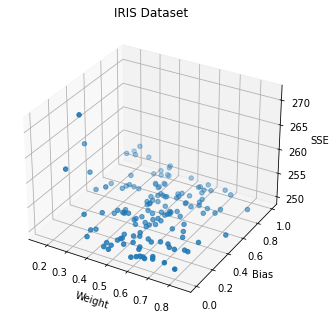

In [37]:
fig = plt.figure()
ax = Axes3D(fig)
plt.title('IRIS Dataset')
x = Plt_values.iloc[:,0]
y = Plt_values.iloc[:,1]
z = Plt_values.iloc[:,2]
ax.scatter(x,y,z)
ax.set_xlabel('Weight')
ax.set_ylabel('Bias')
ax.set_zlabel('SSE')
plt.show()

In [41]:
Plt_values = []
for i in range(0,150):
    w = np.random.rand(11)
    b = np.random.rand()
    sse = cal(p2, w, b, Lable_wine)
    avg_w = np.average(w)
    value = np.array([avg_w,b,sse])
    Plt_values.append(value)
Plt_values = np.array(Plt_values)
Plt_values = pd.DataFrame(Plt_values)
print(sse)


263.0


In [ ]:
fig = plt.figure()
ax = Axes3D(fig)
plt.title('WINE Dataset')
x = Plt_values.iloc[:,0]
y = Plt_values.iloc[:,1]
z = Plt_values.iloc[:,2]
ax.scatter(x,y,z)
ax.set_xlabel('Weight')
ax.set_ylabel('Bias')
ax.set_zlabel('SSE')
plt.show()

In [ ]:
def tf1(n):
    
    if n<0:
        return -1
    elif n >=0:
        return 1
    else:
        pdb.set_trace()

In [ ]:
def singleNeuron(xx, yy):
    
    #1. net = wp
    
    ww= [0,0,0,0]
    b = matrix([0])
    weight = matrix(ww)
    temp_err = []
    for pat, tar in zip(xx, yy):
        
        #pdb.set_trace()
        pat = matrix(pat)
        tar = matrix(tar)
        
        net = weight*pat.T +b 
        #2. a = f(net)     
        ao = tf1(net)
        
        #3. Error = t-a
        error = (tar - ao).tolist()[0][0]
        temp_err.append(error)
        
        #modify the weight
        alpha = 1
        #pdb.set_trace()
        if error >0:
            weight=weight + alpha*error*pat
            b = b+alpha*error
        elif error < 0:
            weight=weight + alpha*error*pat
            b = b+alpha*error
        elif error == 0:
            weight = weight
            b = b
        else:
            pdb.set_trace()
        print("\nWeight=", weight)
        print("\nError=", error)
    return temp_err
    
 
def main():
    ###DATSET###
    pdb.set_trace()
    
    plt.ion()
    plt.figure(1)
    #X_train, X_test, y_train, y_test = dataprocessing()
    xx = [[1,1,1,1],[-1,1,-1,1],[1,1,1,-1],[1,-1,-1,1]] #pattern
    yy = [1,1,-1,-1]
    sse_list = []
    for ii in range(0,100):
        
        error_list = singleNeuron(xx, yy)
        #pdb.set_trace()
        sse_list.append((matrix(error_list)*matrix(error_list).T).tolist()[0][0])
        
        plt.subplot(111)
        plt.plot(sse_list, 'r.-')
        plt.grid(True)
        plt.pause(0.01)
        plt.draw()
        
    
    
    
main()